<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

- The atoms data set is gracefully provided by Prof. Rampi Ramprasad, Georgia Instutute of Technology

**Please add student name and date**

# Start with the basics!

In [84]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

## Import Atom Dataset

In [85]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 17.6MB/s]


In [86]:
df = pd.read_csv('/content/atoms.csv')
df.head(85)

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States
0,H,53,31,0.0708,2.20,72.7690,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1
1,He,31,28,0.1470,0.00,-50.0000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2
2,Li,167,128,0.5340,0.98,59.6320,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1
3,Be,112,96,1.8480,1.57,-50.0000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2
4,B,87,84,2.3400,2.04,26.9890,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Hg,171,132,13.5460,2.00,-50.0000,1006.0,58.500,234.28,629.730,0.138,14.8,8.3000,2
80,Tl,156,145,11.8500,1.62,36.4000,588.9,162.400,576.60,1730.000,0.128,17.2,46.1000,3
81,Pb,154,146,11.3500,1.80,34.4204,715.2,177.800,600.65,2013.000,0.159,18.3,35.3000,4
82,Bi,143,148,9.7470,2.02,90.9240,702.9,172.000,544.50,1883.000,0.124,21.3,7.9000,3


## Simple statistical analysis

Below each markdown section, write a code that will perform the analysis and visualize the results. Feel free to use CodeAssistant in Colab or ChatGPT. If there are additional questions, please provide answers in the markdown fields below the code section/output. While many Python libraries can be used for this analysis, Seaborn can be the most convenient.

1. Create a histogram of the melting point distribution

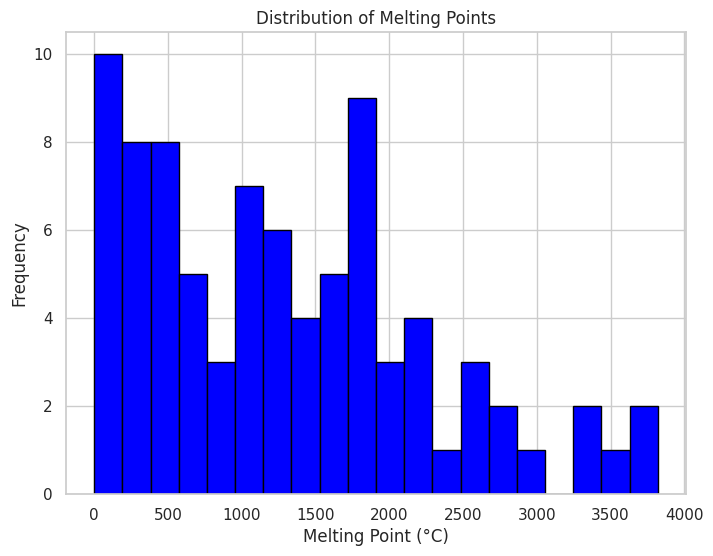

In [87]:
# Assuming the CSV is already loaded into df and 'Melting_Point' is the column of interest
# Replace 'Melting_Point' with the actual column name in your dataset
melting_point_column = 'Melting_Point'  # Update this if necessary

# Plotting the histogram
plt.figure(figsize=(8,6))
plt.hist(df[melting_point_column], bins=20, color='blue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Melting Points')
plt.xlabel('Melting Point (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

2. Create the boxplot of the melting and boiling points

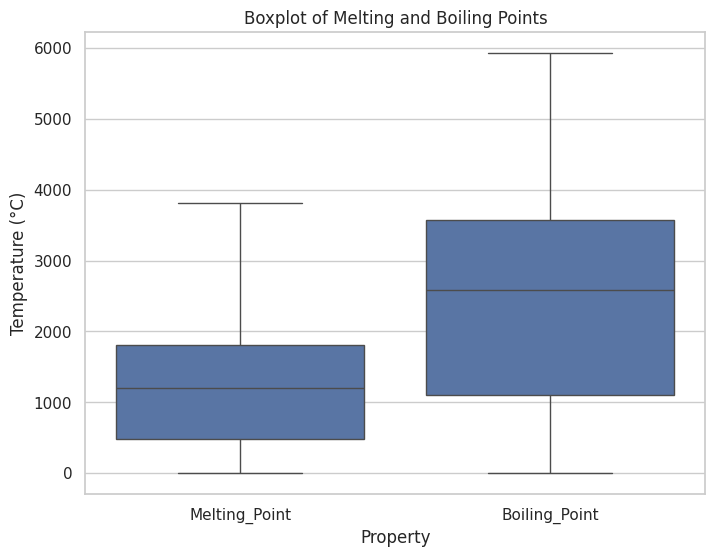

In [88]:
# Assuming 'Melting_Point' and 'Boiling_Point' are the actual column names
melting_point_column = 'Melting_Point'  # Update this with your column name
boiling_point_column = 'Boiling_Point'  # Update this with your column name

# Creating a new DataFrame with only the melting and boiling points for plotting
df_melt_boil = df[[melting_point_column, boiling_point_column]].melt(var_name='Property', value_name='Temperature')

# Plotting the boxplots
plt.figure(figsize=(8,6))
sns.boxplot(x='Property', y='Temperature', data=df_melt_boil)

# Adding labels and title
plt.title('Boxplot of Melting and Boiling Points')
plt.xlabel('Property')
plt.ylabel('Temperature (°C)')

# Show the plot
plt.show()

3. Use the Standard Scaler in the scikit-learn to normalize the values in the table and create the boxplot of all variables. Hint: drop the non-numeric column. In the markdown field, comment on what information does boxplot provide.

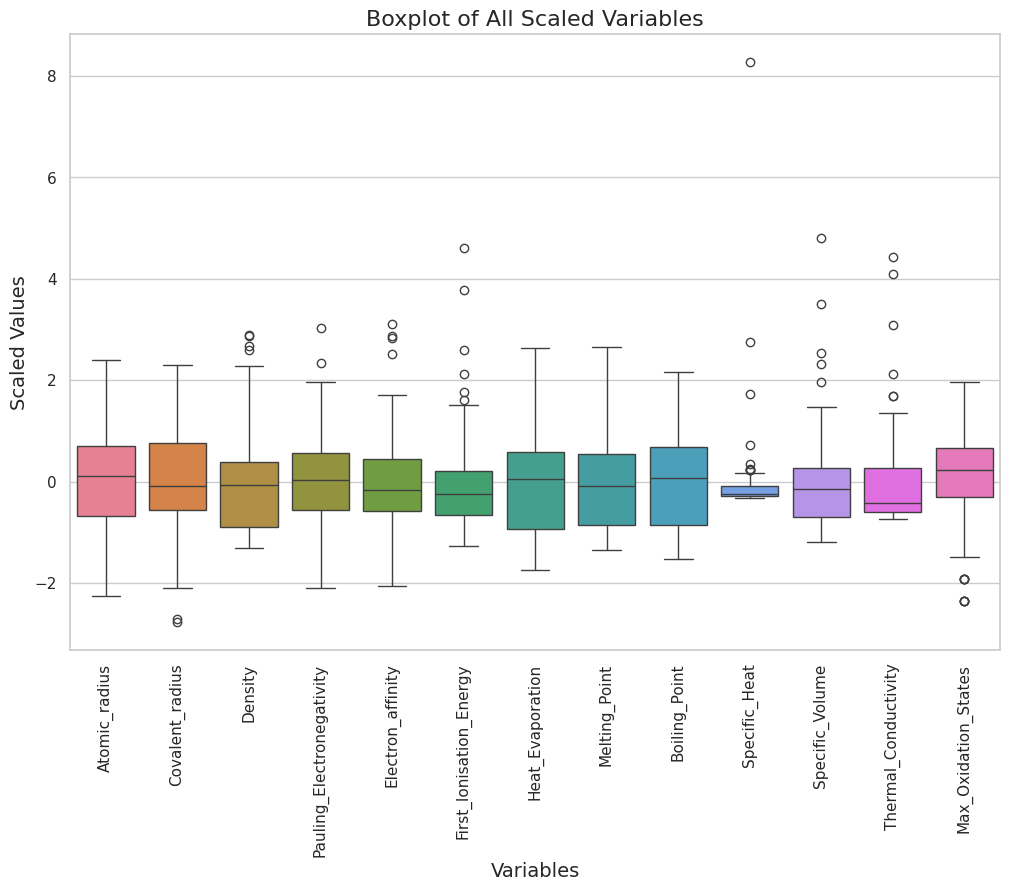

In [90]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/atoms.csv')

# Drop non-numeric columns (assuming there's one or more non-numeric columns)
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Normalize the numeric columns using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Create a boxplot for all the scaled variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled)
plt.title('Boxplot of All Scaled Variables', fontsize=16)
plt.xticks(rotation=90)  # Rotate labels if needed
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Scaled Values', fontsize=14)
plt.show()

Answer 3: The boxplot provides a visual summary of the distribution of data for each variable. Key insights include:

- **Median (center line)**: Represents the median value of the data for each variable after normalization.
- **Interquartile Range (IQR)**: The box shows the range between the 25th percentile (Q1) and the 75th percentile (Q3) values, which represents the middle 50% of the data.
- **Whiskers**: Extend from the box to show the range of the data excluding outliers (typically 1.5 times the IQR).
- **Outliers (dots)**: Points that fall outside the whiskers are considered outliers, representing extreme values.

After normalization, the boxplot shows how each variable's values have been scaled to the same unitless range. This is helpful for comparing variables with different original units or ranges. Outliers are clearly visible, and it shows whether the data is skewed or symmetric.

4. Explore other ways to represent statistical distribution of a single parameter.

**Histogram**

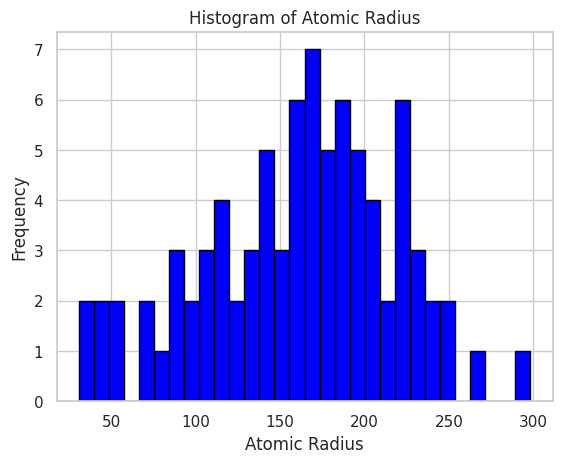

In [91]:
plt.hist(df['Atomic_radius'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Atomic Radius')
plt.xlabel('Atomic Radius')
plt.ylabel('Frequency')
plt.show()

**Kernel Density Estimation (KDE) Plot**

<ipython-input-92-026b8d47c85e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Atomic_radius'], shade=True, color='blue')


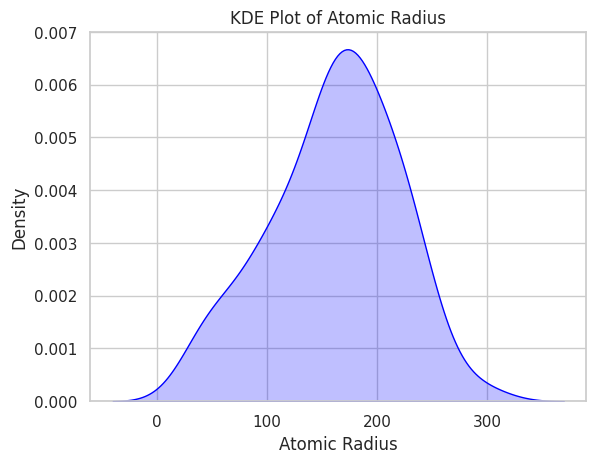

In [92]:
sns.kdeplot(df['Atomic_radius'], shade=True, color='blue')
plt.title('KDE Plot of Atomic Radius')
plt.xlabel('Atomic Radius')
plt.ylabel('Density')
plt.show()

**Boxplot**

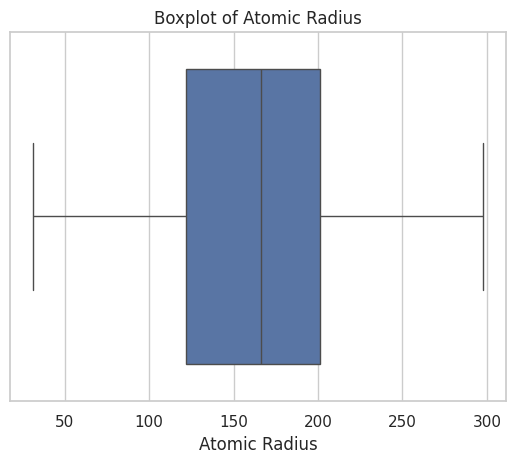

In [93]:
sns.boxplot(x=df['Atomic_radius'])
plt.title('Boxplot of Atomic Radius')
plt.xlabel('Atomic Radius')
plt.show()

**Violin Plot**

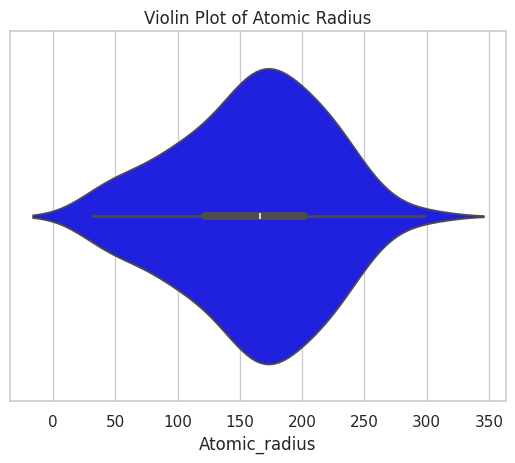

In [94]:
sns.violinplot(x=df['Atomic_radius'], color='blue')
plt.title('Violin Plot of Atomic Radius')
plt.show()

**Cumulative Distribution Function (CDF) Plot**

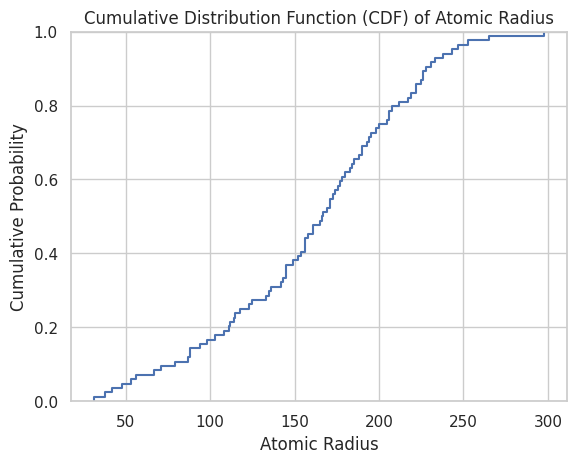

In [95]:
sns.ecdfplot(df['Atomic_radius'])
plt.title('Cumulative Distribution Function (CDF) of Atomic Radius')
plt.xlabel('Atomic Radius')
plt.ylabel('Cumulative Probability')
plt.show()

**Rug Plot**

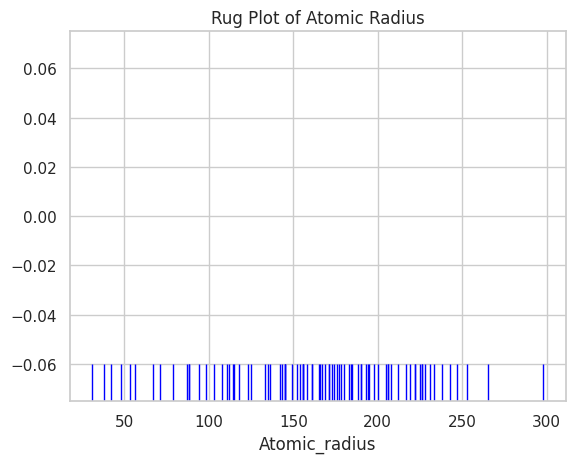

In [96]:
sns.rugplot(df['Atomic_radius'], height=0.1, color='blue')
plt.title('Rug Plot of Atomic Radius')
plt.show()

 **QQ Plot (Quantile-Quantile Plot)**

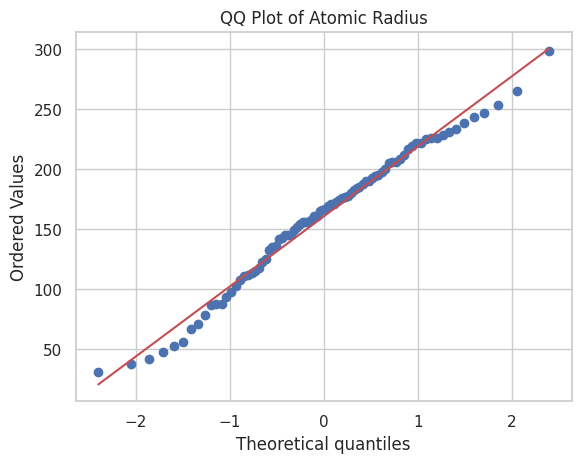

In [97]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['Atomic_radius'], dist="norm", plot=plt)
plt.title('QQ Plot of Atomic Radius')
plt.show()

**Strip Plot**

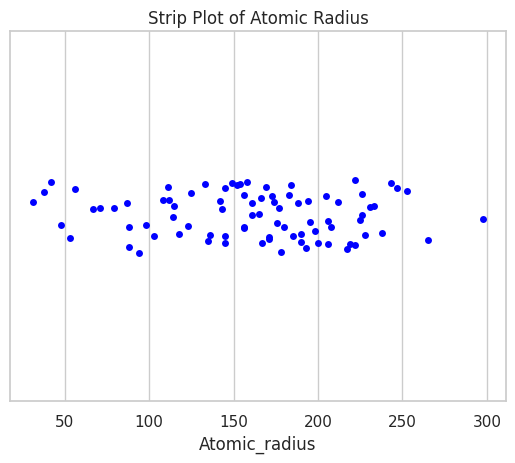

In [98]:
sns.stripplot(x=df['Atomic_radius'], jitter=True, color='blue')
plt.title('Strip Plot of Atomic Radius')
plt.show()

**Swarm Plot**

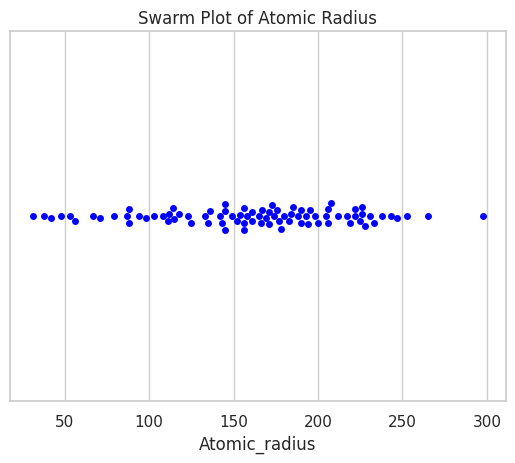

In [99]:
sns.swarmplot(x=df['Atomic_radius'], color='blue')
plt.title('Swarm Plot of Atomic Radius')
plt.show()

**Dot Plot**

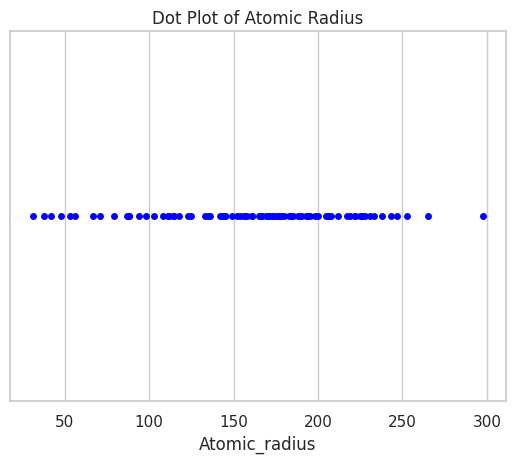

In [100]:
sns.stripplot(x=df['Atomic_radius'], jitter=False, color='blue')
plt.title('Dot Plot of Atomic Radius')
plt.show()

## Correlation analysis

5. Plot the correlation between the melting point and boiling point and between covalent radius and density. In the markdown section, rationalize the observations.

Index(['Symbol', 'Atomic_radius', 'Covalent_radius', 'Density',
       'Pauling_Electronegativity', 'Electron_affinity',
       'First_Ionisation_Energy', 'Heat_Evaporation', 'Melting_Point',
       'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
       'Thermal_Conductivity', 'Max_Oxidation_States'],
      dtype='object')


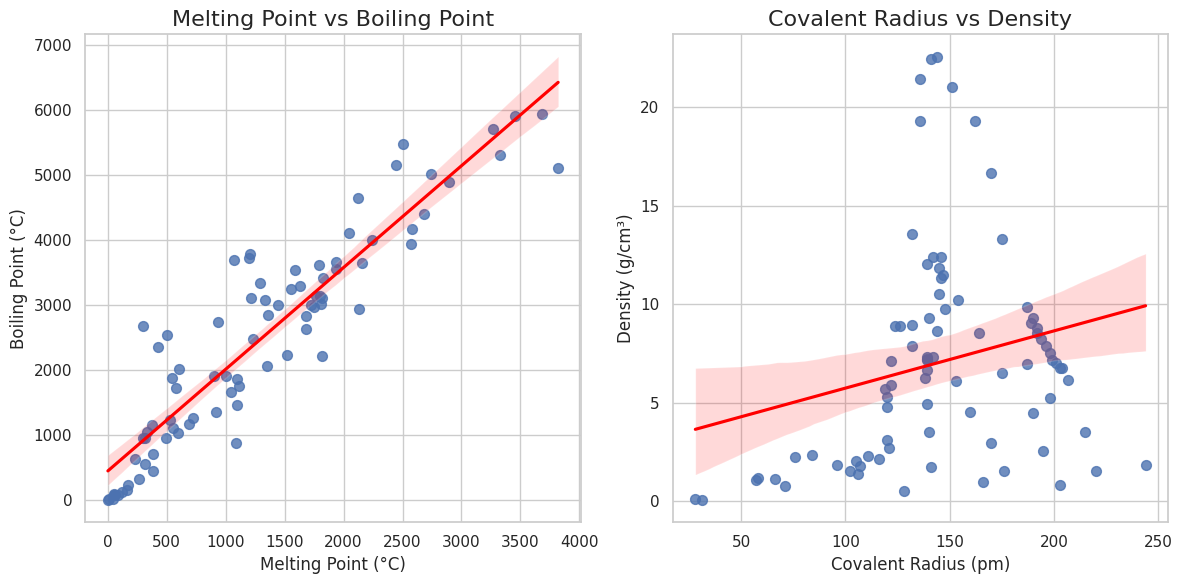

In [101]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/atoms.csv')
print(df.columns)  # Check the column names

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plot correlation between Melting Point and Boiling Point
plt.figure(figsize=(12, 6))

# Scatterplot with regression line for Melting Point vs Boiling Point
plt.subplot(1, 2, 1)
sns.regplot(x='Melting_Point', y='Boiling_Point', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Melting Point vs Boiling Point', fontsize=16)
plt.xlabel('Melting Point (°C)', fontsize=12)
plt.ylabel('Boiling Point (°C)', fontsize=12)

# Scatterplot with regression line for Covalent Radius vs Density
plt.subplot(1, 2, 2)
sns.regplot(x='Covalent_radius', y='Density', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Covalent Radius vs Density', fontsize=16)
plt.xlabel('Covalent Radius (pm)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

Answer 5: Observations:

**Rationalizing the Observations:**

**Melting Point vs. Boiling Point:**


*   **Observation:** The scatterplot and regression line show a positive correlation between the melting point and the boiling point. This implies that elements with higher melting points generally have higher boiling points.
*   **Rationale:** Both the melting point and boiling point are influenced by the strength of intermolecular or interatomic forces. Elements with strong bonds or high molecular interactions require more energy to transition from solid to liquid (melting) and from liquid to gas (boiling). Hence, a higher melting point is often accompanied by a higher boiling point because both transitions involve breaking similar types of bonds.


**Covalent Radius vs. Density:**


*   **Observation:** The scatterplot and regression line suggest a negative correlation between covalent radius and density. This means that as the covalent radius of an element increases, its density tends to decrease.
*   **Rationale:** Covalent radius measures the size of an atom, while density is mass per unit volume. Larger atoms (those with larger covalent radii) occupy more space, but their masses do not increase proportionally. As a result, the volume increases faster than the mass, leading to a lower density. This explains why elements with larger atomic sizes (and covalent radii) often have lower densities.




6. Create a heatmap of correlation coefficients between the entries in the table. Find by direct examination the groups of parameters with strongest positive and strongest negative correlations. In the markdown section, rationalize the observations.

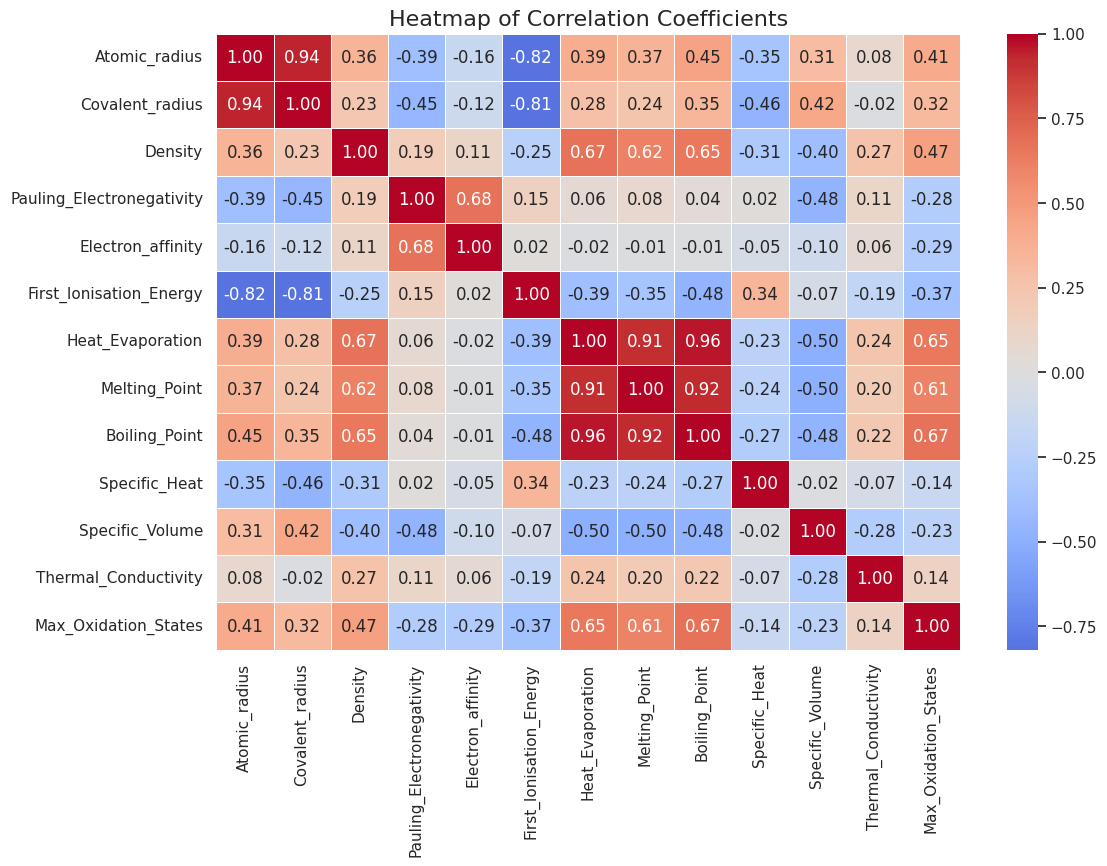

In [102]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/atoms.csv')

# Drop non-numeric columns (e.g., 'Symbol')
df_numeric = df.drop(columns=['Symbol'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')

# Add title
plt.title('Heatmap of Correlation Coefficients', fontsize=16)

# Show the plot
plt.show()

Answer 6: **Rationalizing the Observations:**

From the heatmap of correlation coefficients, we can directly observe the strongest positive and negative correlations between variables.

**Strongest Positive Correlations:**


*   **Melting Point vs. Boiling Point:** These two parameters show one of the strongest positive correlations, as both phase transitions are influenced by similar atomic or molecular forces. Substances with higher melting points generally have higher boiling points due to the increased energy required to change phases.
*   **Heat of Evaporation vs. Boiling Point:** The strong positive correlation between these two variables can be explained by the fact that the heat required to evaporate a substance is higher for substances that boil at higher temperatures. This reflects the energy needed to overcome molecular forces during vaporization.

*   **Density vs. Thermal Conductivity:** This correlation suggests that denser elements tend to have higher thermal conductivities. This can be understood in the context of how closely packed atoms allow heat to transfer more effectively through the material.


**Strongest Negative Correlations:**

*   **Covalent Radius vs. Density:** This is one of the strongest negative correlations. As atomic size increases (larger covalent radius), the density typically decreases because larger atoms take up more space without a proportional increase in mass, leading to a lower mass per unit volume.
*   **Specific Volume vs. Density:** These two are inversely related by definition. Specific volume is the reciprocal of density, so an increase in one naturally corresponds to a decrease in the other.




7. Create a pair distribution plot of Atomic_radius, Covalent_radius,Pauling_Electronegativity and First_Ionisation_Energy

---



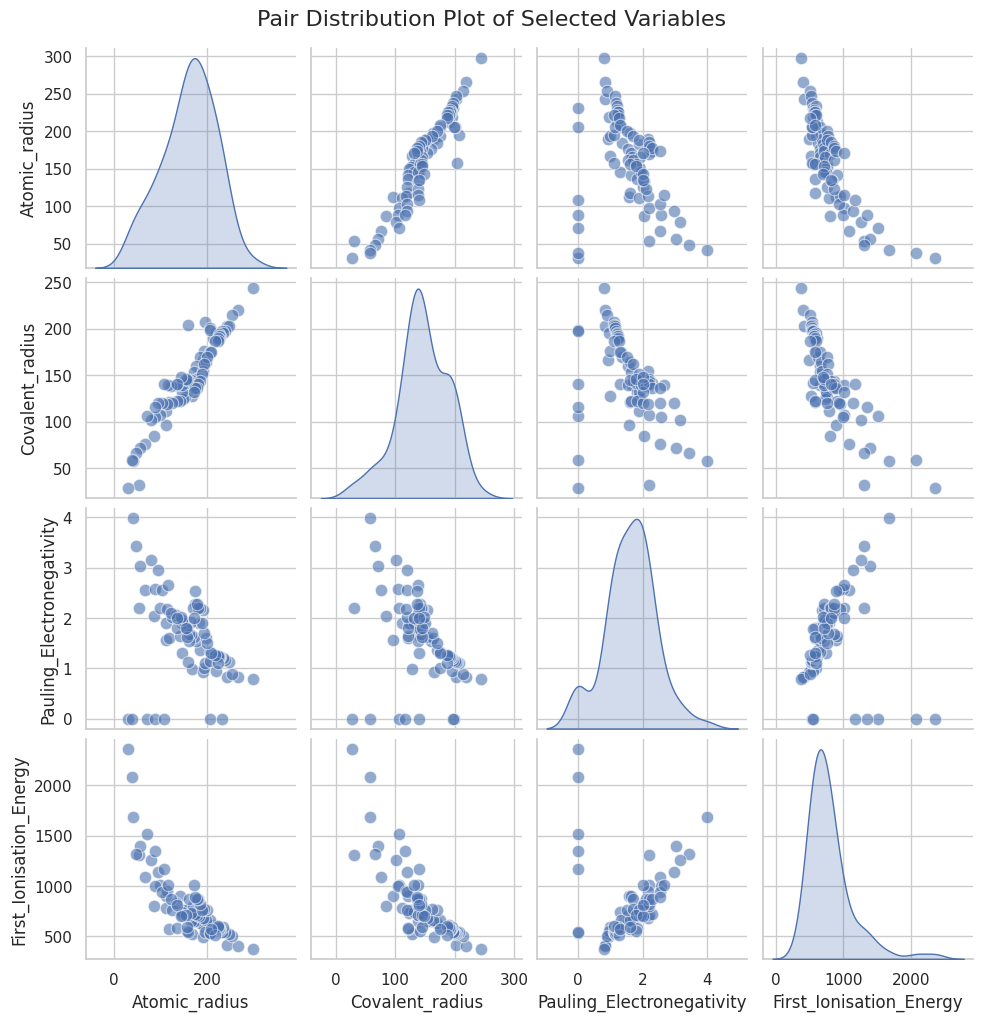

In [103]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/atoms.csv')

# Select only the columns of interest
df_selected = df[['Atomic_radius', 'Covalent_radius', 'Pauling_Electronegativity', 'First_Ionisation_Energy']]

# Create a pairplot for the selected variables
sns.pairplot(df_selected, diag_kind='kde', plot_kws={'alpha':0.6, 's':80})

# Add title to the plot
plt.suptitle('Pair Distribution Plot of Selected Variables', y=1.02, fontsize=16)

# Show the plot
plt.show()

## Simple Regression

8. Perform a linear fit between the boiling temperature and melting temperature and between specific heat and melting point. Provide the values of fit coefficients and units.

Boiling Point vs Melting Point:
Slope: 1.5631228219225464 °C/°C
Intercept: 450.83517074859515 °C

Specific Heat vs Melting Point:
Slope: -0.0004086309619233036 J/(g·°C)/°C
Intercept: 1.1692372779747011 J/(g·°C)


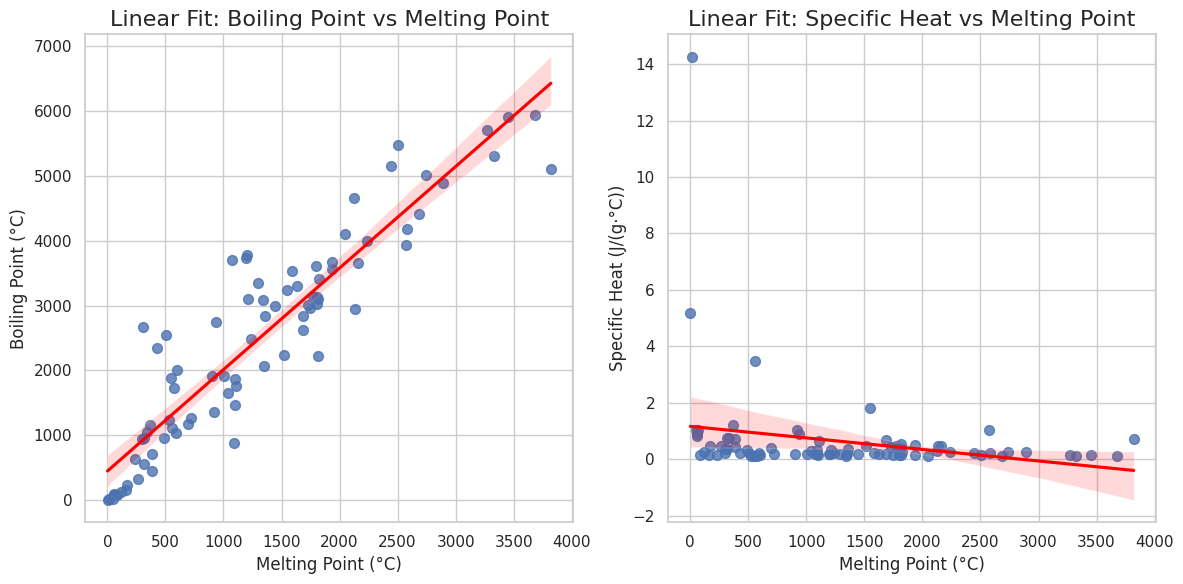

In [104]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/atoms.csv')

# Drop rows with missing data for the selected variables
df_clean = df[['Boiling_Point', 'Melting_Point', 'Specific_Heat']].dropna()

# Perform linear regression for Boiling Point vs Melting Point
X_bp_mp = df_clean['Melting_Point'].values.reshape(-1, 1)  # Melting Point (independent variable)
y_bp_mp = df_clean['Boiling_Point'].values  # Boiling Point (dependent variable)

model_bp_mp = LinearRegression()
model_bp_mp.fit(X_bp_mp, y_bp_mp)

# Get the coefficients for Boiling Point vs Melting Point
slope_bp_mp = model_bp_mp.coef_[0]
intercept_bp_mp = model_bp_mp.intercept_

# Perform linear regression for Specific Heat vs Melting Point
X_sh_mp = df_clean['Melting_Point'].values.reshape(-1, 1)  # Melting Point (independent variable)
y_sh_mp = df_clean['Specific_Heat'].values  # Specific Heat (dependent variable)

model_sh_mp = LinearRegression()
model_sh_mp.fit(X_sh_mp, y_sh_mp)

# Get the coefficients for Specific Heat vs Melting Point
slope_sh_mp = model_sh_mp.coef_[0]
intercept_sh_mp = model_sh_mp.intercept_

# Print the fit coefficients
print(f"Boiling Point vs Melting Point:")
print(f"Slope: {slope_bp_mp} °C/°C")
print(f"Intercept: {intercept_bp_mp} °C")

print(f"\nSpecific Heat vs Melting Point:")
print(f"Slope: {slope_sh_mp} J/(g·°C)/°C")
print(f"Intercept: {intercept_sh_mp} J/(g·°C)")

# Plot Boiling Point vs Melting Point with regression line
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Melting_Point', y='Boiling_Point', data=df_clean, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Linear Fit: Boiling Point vs Melting Point', fontsize=16)
plt.xlabel('Melting Point (°C)', fontsize=12)
plt.ylabel('Boiling Point (°C)', fontsize=12)

# Plot Specific Heat vs Melting Point with regression line
plt.subplot(1, 2, 2)
sns.regplot(x='Melting_Point', y='Specific_Heat', data=df_clean, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Linear Fit: Specific Heat vs Melting Point', fontsize=16)
plt.xlabel('Melting Point (°C)', fontsize=12)
plt.ylabel('Specific Heat (J/(g·°C))', fontsize=12)

plt.tight_layout()
plt.show()

# Explore the classification

Let's create a simple data set that will allow us to explore several simple classifiers


   Feature_1  Feature_2  Feature_3  Feature_4  Target
0  -0.197338  -0.151273   1.837844   2.278946       1
1  -0.473839  -0.014452   1.242437   1.266971       1
2  -0.027305  -0.933268  -2.859960   1.579684       0
3  -0.111226  -0.903908  -0.078288   0.186407       0
4  -0.268531  -0.891192   1.142011   1.391837       1


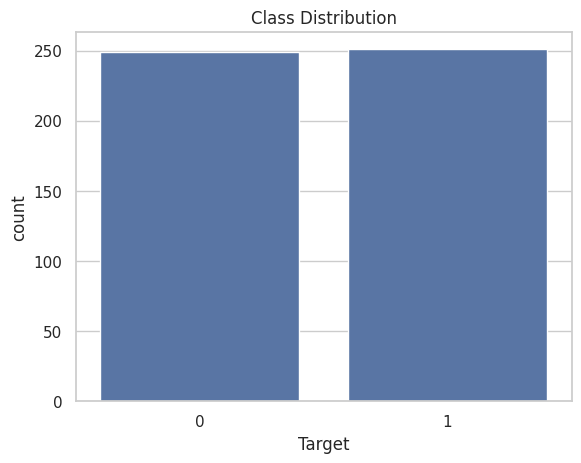

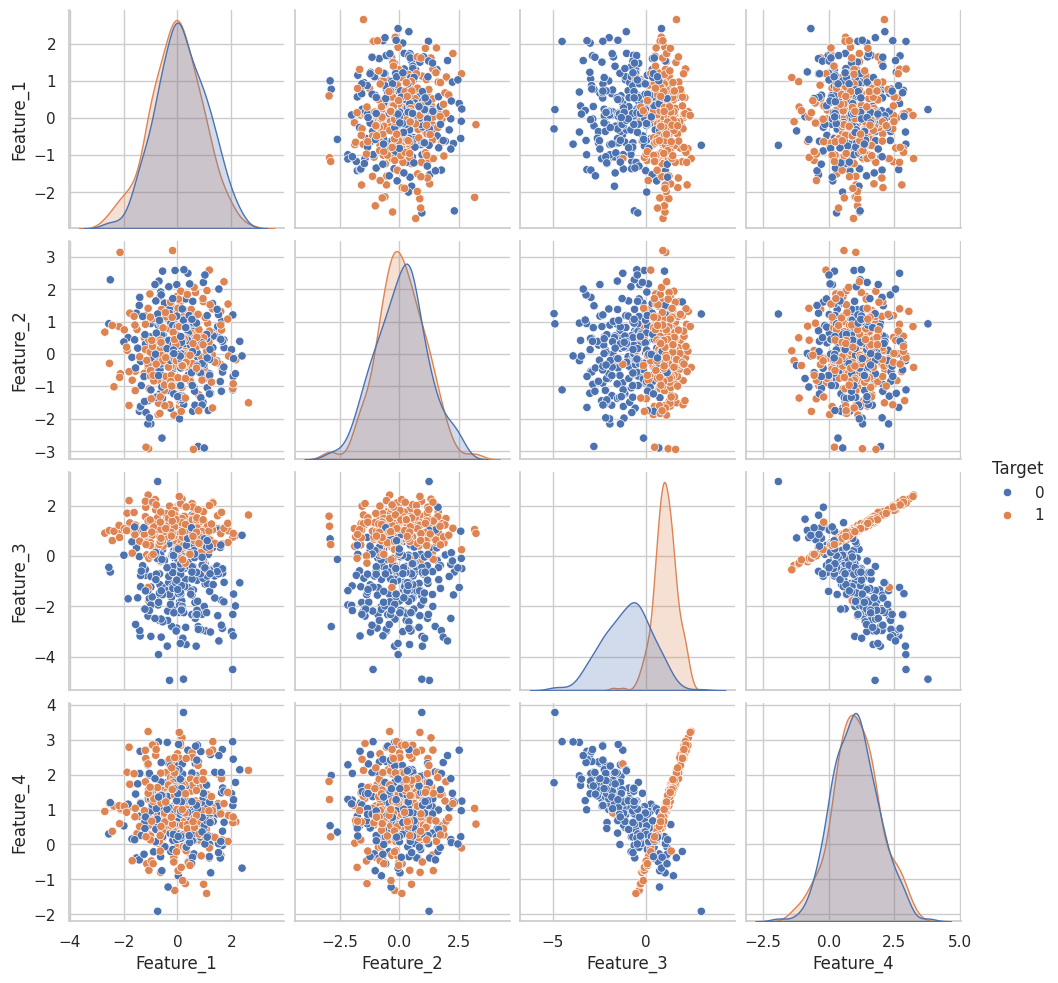

In [105]:
# Generate a simple classification dataset
X, y = make_classification(n_samples=500,       # Number of samples
                           n_features=4,        # Number of features
                           n_informative=2,     # Number of informative features
                           n_redundant=0,       # Number of redundant features
                           n_clusters_per_class=1,
                           random_state=42)     # Random state for reproducibility

# Convert to a DataFrame
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])
df['Target'] = y

# Display the first 5 rows of the dataset
print(df.head())

# Visualize the distribution of the classes (target variable)
sns.countplot(x='Target', data=df)
plt.title('Class Distribution')
plt.show()

# Pairplot to visualize the relationship between the features and the target
sns.pairplot(df, hue='Target')
plt.show()

9. Experiment with the different classifiers for this data set:
- Create train-test split (say 30-70)
- Build the decision tree classifier
- Explore the outputs if you vary the depth of the tree
- And see how the performance changes if you change the number of points in the data set (say compare 100 and 1000)
- Visualize the decision surface (use examples from class Colab)

<Figure size 600x600 with 0 Axes>

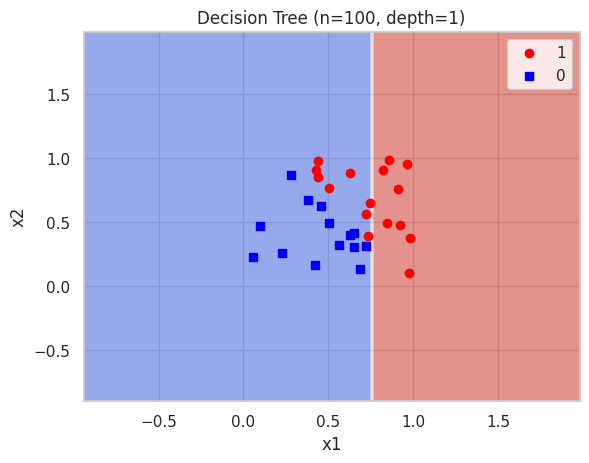

Data Points: 100, Max Depth: 1, Accuracy: 0.73


<Figure size 600x600 with 0 Axes>

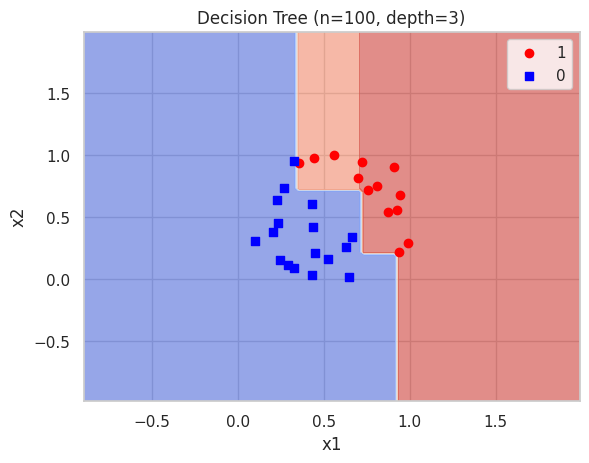

Data Points: 100, Max Depth: 3, Accuracy: 1.00


<Figure size 600x600 with 0 Axes>

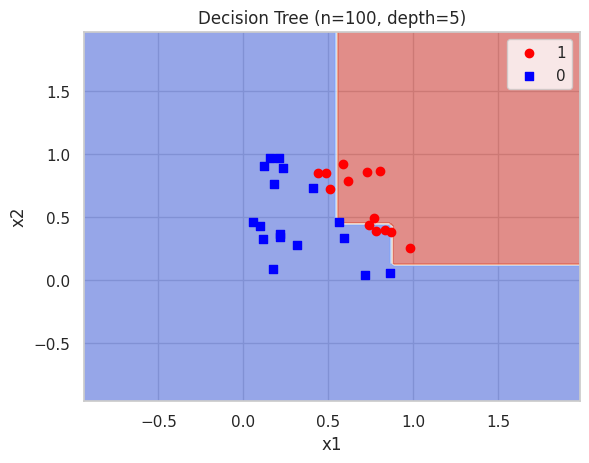

Data Points: 100, Max Depth: 5, Accuracy: 0.73


<Figure size 600x600 with 0 Axes>

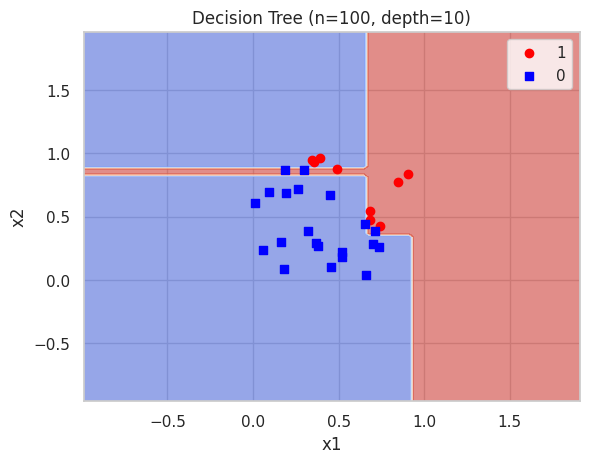

Data Points: 100, Max Depth: 10, Accuracy: 0.80


<Figure size 600x600 with 0 Axes>

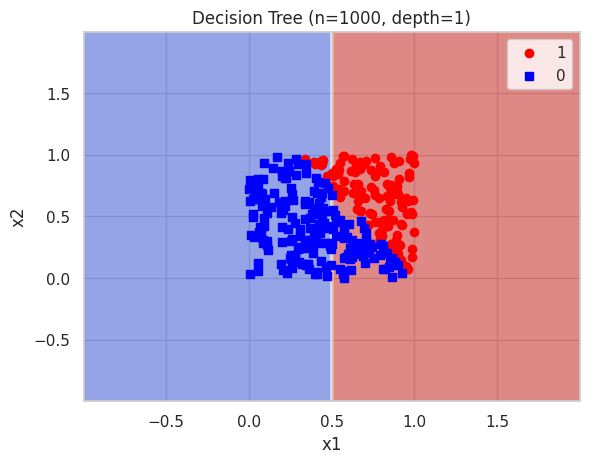

Data Points: 1000, Max Depth: 1, Accuracy: 0.79


<Figure size 600x600 with 0 Axes>

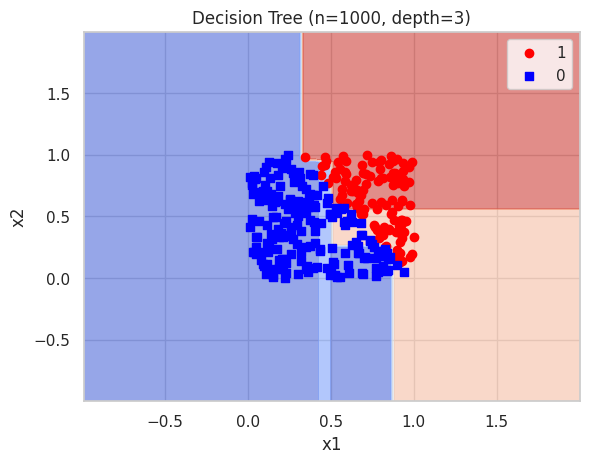

Data Points: 1000, Max Depth: 3, Accuracy: 0.91


<Figure size 600x600 with 0 Axes>

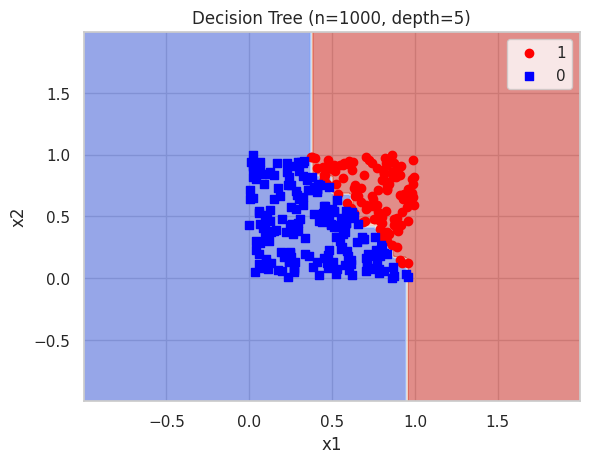

Data Points: 1000, Max Depth: 5, Accuracy: 0.96


<Figure size 600x600 with 0 Axes>

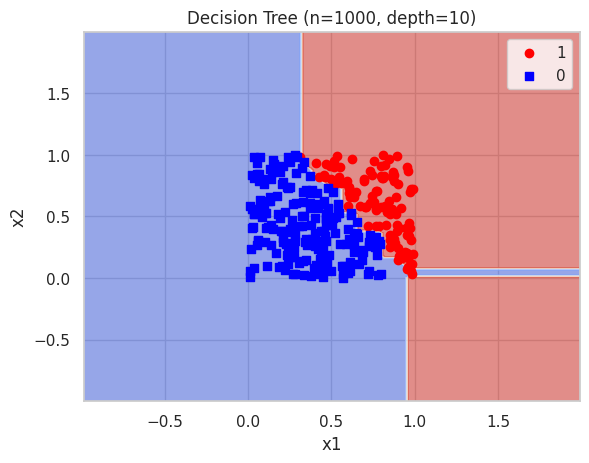

Data Points: 1000, Max Depth: 10, Accuracy: 0.97


In [106]:
# Function to generate dataset
def generate_data(n=1000):
    x1 = np.random.uniform(0, 1, n)
    x2 = np.random.uniform(0, 1, n)
    y = (x1 + 0.7*x2 >= 1).astype(int)
    return np.column_stack((x1, x2)), y

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title='Decision Surface'):
    plt.figure(figsize=(6, 6))
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap='coolwarm', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o', label='1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='s', label='0')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Function to train and evaluate a decision tree classifier
def experiment(n_points, max_depth):
    # Generate data
    X, y = generate_data(n_points)

    # Split the data (30% test, 70% train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot the decision boundary
    plot_decision_boundary(clf, X_test, y_test, title=f'Decision Tree (n={n_points}, depth={max_depth})')

    print(f'Data Points: {n_points}, Max Depth: {max_depth}, Accuracy: {accuracy:.2f}')

# Experiment with 100 and 1000 points and varying tree depths
for n_points in [100, 1000]:
    for depth in [1, 3, 5, 10]:
        experiment(n_points, depth)

In [111]:
# Split the data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 350, Test size: 150


In [113]:
# Generate a smaller dataset with 100 points
X_small, y_small = make_classification(n_samples=100, n_features=4, n_informative=2, random_state=42)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.3, random_state=42)

# Generate a larger dataset with 1000 points
X_large, y_large = make_classification(n_samples=1000, n_features=4, n_informative=2, random_state=42)
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X_large, y_large, test_size=0.3, random_state=42)

# Evaluate decision trees on both smaller and larger datasets
print("\nPerformance on smaller dataset (100 points):")
evaluate_decision_tree(depths, X_train_small, X_test_small, y_train_small, y_test_small)

print("\nPerformance on larger dataset (1000 points):")
evaluate_decision_tree(depths, X_train_large, X_test_large, y_train_large, y_test_large)


Performance on smaller dataset (100 points):
Depth: 1 -> Train Accuracy: 0.96, Test Accuracy: 0.93
Depth: 2 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 3 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 4 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 5 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 6 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 7 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 8 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 9 -> Train Accuracy: 1.00, Test Accuracy: 0.93
Depth: 10 -> Train Accuracy: 1.00, Test Accuracy: 0.93

Performance on larger dataset (1000 points):
Depth: 1 -> Train Accuracy: 0.87, Test Accuracy: 0.87
Depth: 2 -> Train Accuracy: 0.87, Test Accuracy: 0.87
Depth: 3 -> Train Accuracy: 0.88, Test Accuracy: 0.87
Depth: 4 -> Train Accuracy: 0.92, Test Accuracy: 0.89
Depth: 5 -> Train Accuracy: 0.92, Test Accuracy: 0.87
Depth: 6 -> Train Accuracy: 0.94, Test Accuracy: 0.87
Depth: 7 -> Train Accuracy: 0.96, Test Accu

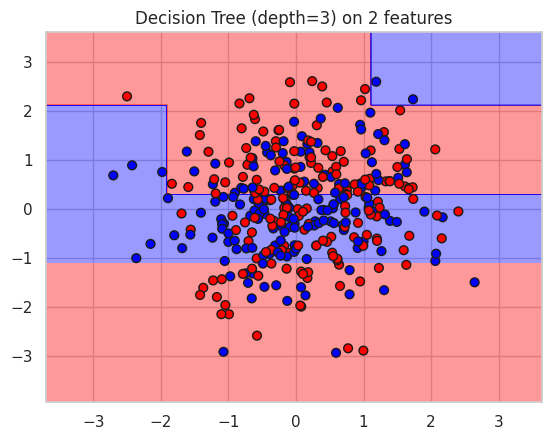

In [114]:
# Function to plot decision boundary
def plot_decision_surface(X, y, classifier, title, resolution=0.02):
    # Setup the grid for the decision surface plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predict on the grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot the decision surface
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', marker='o', cmap=ListedColormap(('red', 'blue')))
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(title)
    plt.show()

# Train a decision tree classifier on two features and plot the decision surface
X_two_features = X_train[:, :2]  # Use only the first two features for visualization
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_two_features, y_train)

# Plot decision surface for the first two features
plot_decision_surface(X_train[:, :2], y_train, tree_clf, "Decision Tree (depth=3) on 2 features")

10. Do the same for the perceptron classifier

<Figure size 600x600 with 0 Axes>

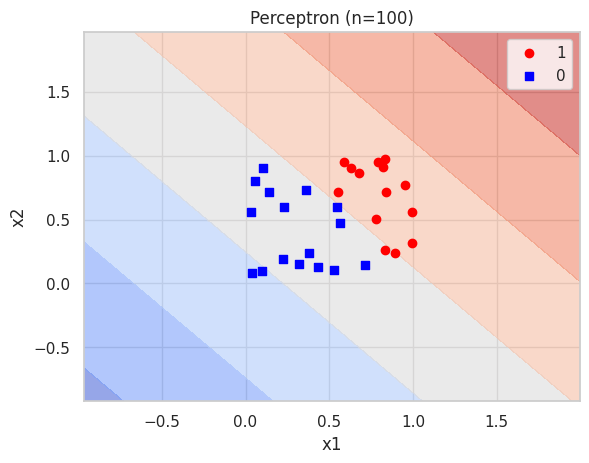

Data Points: 100, Accuracy: 0.93


<Figure size 600x600 with 0 Axes>

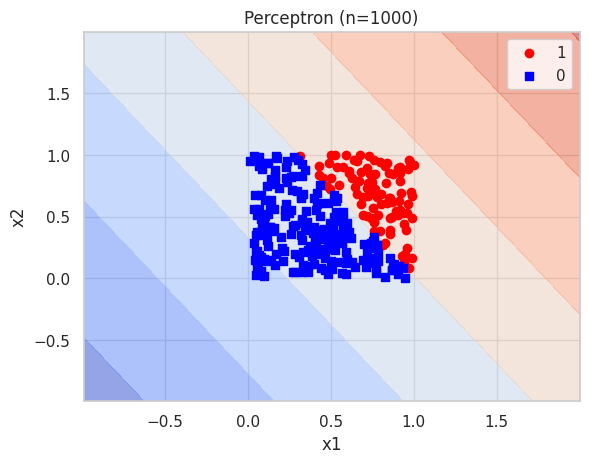

Data Points: 1000, Accuracy: 0.99


In [115]:
# Function to generate dataset (same as before)
def generate_data(n=1000):
    x1 = np.random.uniform(0, 1, n)
    x2 = np.random.uniform(0, 1, n)
    y = (x1 + 0.7*x2 >= 1).astype(int)
    return np.column_stack((x1, x2)), y

# Function to plot decision boundary (same as before)
def plot_decision_boundary(clf, X, y, title='Decision Surface'):
    plt.figure(figsize=(6, 6))
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap='coolwarm', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o', label='1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='s', label='0')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Function to train and evaluate a Perceptron classifier
def experiment_perceptron(n_points):
    # Generate data
    X, y = generate_data(n_points)

    # Split the data (30% test, 70% train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Perceptron Classifier
    clf = Perceptron(random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot the decision boundary
    plot_decision_boundary(clf, X_test, y_test, title=f'Perceptron (n={n_points})')

    print(f'Data Points: {n_points}, Accuracy: {accuracy:.2f}')

# Experiment with 100 and 1000 points
for n_points in [100, 1000]:
    experiment_perceptron(n_points)

11. Do the same for the logistics regression classifier
- Experiment with the regularization parameters
- Can you plot the data for small number of points but also add class probabilities?

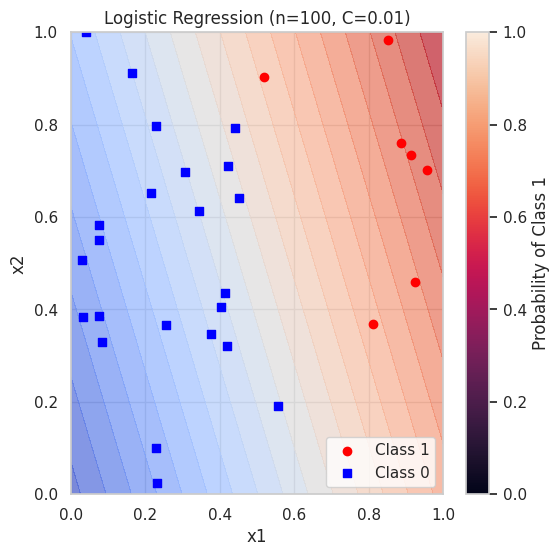

Data Points: 100, Regularization (C): 0.01, Accuracy: 0.77


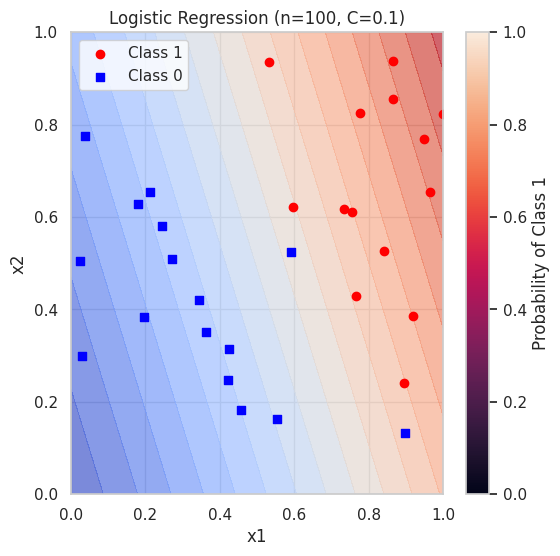

Data Points: 100, Regularization (C): 0.1, Accuracy: 0.53


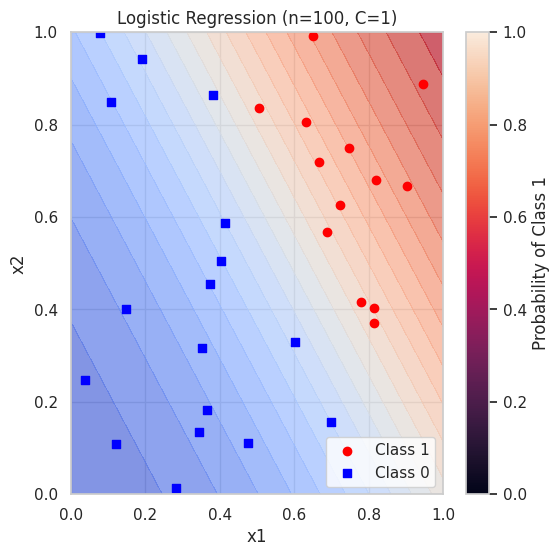

Data Points: 100, Regularization (C): 1, Accuracy: 1.00


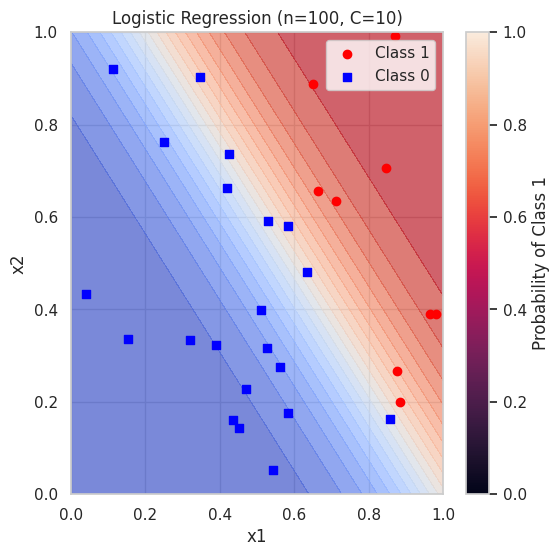

Data Points: 100, Regularization (C): 10, Accuracy: 0.83


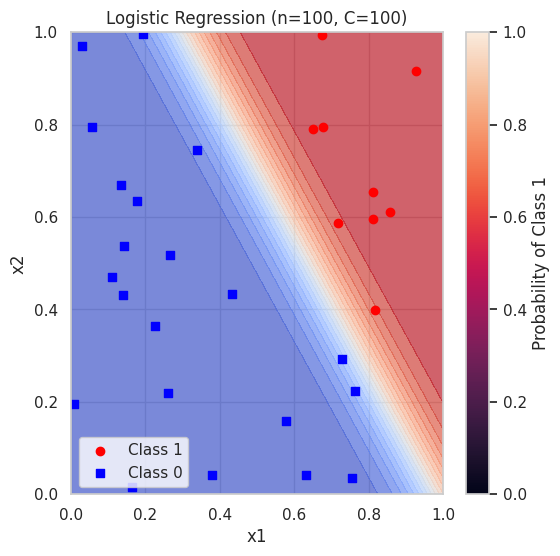

Data Points: 100, Regularization (C): 100, Accuracy: 1.00


In [116]:
# Function to generate dataset (same as before)
def generate_data(n=1000):
    x1 = np.random.uniform(0, 1, n)
    x2 = np.random.uniform(0, 1, n)
    y = (x1 + 0.7*x2 >= 1).astype(int)
    return np.column_stack((x1, x2)), y

# Function to plot decision boundary with class probabilities
def plot_decision_boundary_with_probabilities(clf, X, y, title='Decision Surface with Probabilities'):
    plt.figure(figsize=(6, 6))

    # Create a grid of points to evaluate the probabilities
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Get the predicted probabilities for each point on the grid
    probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

    # Plot the class probabilities as a contour plot
    plt.contourf(xx, yy, probs, levels=20, cmap='coolwarm', alpha=0.7)

    # Plot the original data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o', label='Class 1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', marker='s', label='Class 0')

    plt.colorbar(label='Probability of Class 1')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Function to train and evaluate a logistic regression classifier with regularization
def experiment_logistic_regression(n_points, regularization_param):
    # Generate data
    X, y = generate_data(n_points)

    # Split the data (30% test, 70% train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Logistic Regression Classifier with varying regularization
    clf = LogisticRegression(C=regularization_param, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test set and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot the decision boundary with probabilities
    plot_decision_boundary_with_probabilities(clf, X_test, y_test, title=f'Logistic Regression (n={n_points}, C={regularization_param})')

    print(f'Data Points: {n_points}, Regularization (C): {regularization_param}, Accuracy: {accuracy:.2f}')

# Experiment with 100 points and different regularization parameters
for C_value in [0.01, 0.1, 1, 10, 100]:
    experiment_logistic_regression(100, C_value)

### Observations:

#### 1. Regularization Effect:
- As we **increase the regularization strength** (i.e., use smaller `C` values like 0.01), the model becomes more constrained and tends to create simpler decision boundaries, which may **underfit** the data.
- When the **regularization is weaker** (i.e., larger `C` values like 10 or 100), the model is less constrained and can better fit the training data, which may improve performance but risks **overfitting** the data.

#### 2. Class Probabilities:
- For small datasets (100 points), adding the class probabilities to the decision surface visualization helps us understand how confident the model is in its predictions.
- **In regions near the decision boundary**, the class probabilities are close to 0.5, indicating uncertainty in classification.
- **Further from the boundary**, the probabilities approach 0 or 1, indicating stronger confidence in the predicted class.

#### 3. Effect of Dataset Size:
- The logistic regression model performs reasonably well with a small number of data points because it is inherently a **linear classifier**, and the decision boundary in the generated data is linear.
- However, with fewer data points, the model may suffer from **variance**, especially at higher values of `C` (less regularization), where overfitting can occur.

# Bring in the LLM!

12. Here, we are going to use the ChatGPT to summarize the data about elements, and then use the information from our data set in the beginning of the notebook as features. This will be non-trivial process, because rather then working with the already provided data, we will have a chance to create our data set and discover that formats matter. Several steps:

- We want to get from ChatGPT table of the electronic properties of elements in the form where first column is element symbol, and the second column is metal/dielectric/semiconductor. It may take a few iterations - since ChatGPT will tend to introduce other forms of classification (e.g. metalloid). You can ask it early on to use Python form, that you can just cut and paste into Colab.

In [117]:
elements_electronic_properties = {
    "H": "dielectric", "He": "dielectric", "Li": "metal", "Be": "metal", "B": "semiconductor", "C": "dielectric",
    "N": "dielectric", "O": "dielectric", "F": "dielectric", "Ne": "dielectric", "Na": "metal", "Mg": "metal",
    "Al": "metal", "Si": "semiconductor", "P": "dielectric", "S": "dielectric", "Cl": "dielectric", "Ar": "dielectric",
    "K": "metal", "Ca": "metal", "Sc": "metal", "Ti": "metal", "V": "metal", "Cr": "metal", "Mn": "metal",
    "Fe": "metal", "Co": "metal", "Ni": "metal", "Cu": "metal", "Zn": "metal", "Ga": "semiconductor", "Ge": "semiconductor",
    "As": "semiconductor", "Se": "semiconductor", "Br": "dielectric", "Kr": "dielectric", "Rb": "metal",
    "Sr": "metal", "Y": "metal", "Zr": "metal", "Nb": "metal", "Mo": "metal", "Tc": "metal", "Ru": "metal",
    "Rh": "metal", "Pd": "metal", "Ag": "metal", "Cd": "metal", "In": "semiconductor", "Sn": "semiconductor",
    "Sb": "semiconductor", "Te": "semiconductor", "I": "dielectric", "Xe": "dielectric", "Cs": "metal", "Ba": "metal",
    "La": "metal", "Ce": "metal", "Pr": "metal", "Nd": "metal", "Pm": "metal", "Sm": "metal", "Eu": "metal",
    "Gd": "metal", "Tb": "metal", "Dy": "metal", "Ho": "metal", "Er": "metal", "Tm": "metal", "Yb": "metal",
    "Lu": "metal", "Hf": "metal", "Ta": "metal", "W": "metal", "Re": "metal", "Os": "metal", "Ir": "metal",
    "Pt": "metal", "Au": "metal", "Hg": "metal", "Tl": "semiconductor", "Pb": "semiconductor", "Bi": "semiconductor",
    "Po": "semiconductor", "At": "semiconductor", "Rn": "dielectric", "Fr": "metal", "Ra": "metal", "Ac": "metal",
    "Th": "metal", "Pa": "metal", "U": "metal", "Np": "metal", "Pu": "metal", "Am": "metal", "Cm": "metal"
}

In [118]:
# Convert the dictionary to a DataFrame
electronic_properties_df = pd.DataFrame(list(elements_electronic_properties.items()), columns=['Element', 'Electronic_Property'])

# Display the DataFrame
print(electronic_properties_df.head())

  Element Electronic_Property
0       H          dielectric
1      He          dielectric
2      Li               metal
3      Be               metal
4       B       semiconductor


- The dataframe df in the beginning of the notebook that has feature vectors, and the dataframe you will get from ChatGPT will have different number of elements. You will have to pick the ones that are common to both. The easy way to do it is to convert corresponding columns to lists, and then do something like this: new_list = list(set(list1) & set(list2)). Then pick from both dataframes only rows that have elements present in the new_list

In [119]:
# Manually adding 500 symbols (example list, adjust as needed)
element_symbols = ['H', 'He', 'Li', 'Be', 'B'] * 100  # This will repeat the list to match 500 rows

# Add this list as a new column to the dataframe
df['Element_Symbol'] = element_symbols

# Verify that the new column has been added
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Target Element_Symbol
0  -0.197338  -0.151273   1.837844   2.278946       1              H
1  -0.473839  -0.014452   1.242437   1.266971       1             He
2  -0.027305  -0.933268  -2.859960   1.579684       0             Li
3  -0.111226  -0.903908  -0.078288   0.186407       0             Be
4  -0.268531  -0.891192   1.142011   1.391837       1              B


In [125]:
# Example: Mapping based on another column (e.g., Feature_1)
symbol_mapping = {
    'Value1': 'H',  # Replace 'Value1' with actual data from Feature_1 or other columns
    'Value2': 'He',
    'Value3': 'Li',
    # Add as many mappings as needed
}

# Create a new 'Element_Symbol' column based on the mapping
df['Element_Symbol'] = df['Feature_1'].map(symbol_mapping)

# Verify that the new column has been added
print(df.head())

              Feature_1  Feature_2  Feature_3  Feature_4  Target  \
0   -0.1973384203073261  -0.151273   1.837844   2.278946       1   
1  -0.47383934707091613  -0.014452   1.242437   1.266971       1   
2  -0.02730453950993186  -0.933268  -2.859960   1.579684       0   
3  -0.11122606134870032  -0.903908  -0.078288   0.186407       0   
4   -0.2685306479058323  -0.891192   1.142011   1.391837       1   

  Element_Symbol  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


In [127]:
# Sample dataframe with correct element symbols
data = {'Feature_1': [1, 2, 3],
        'Feature_2': [5, 4, 3],
        'Feature_3': [10, 20, 30],
        'Symbol': ['H', 'He', 'Li']}  # Correct element symbols

df = pd.DataFrame(data)

# Use the actual element symbols from the 'Symbol' column
df['Element_Symbol'] = df['Symbol']  # Use actual element symbol column

# Verify the result
print(df)

   Feature_1  Feature_2  Feature_3 Symbol Element_Symbol
0          1          5         10      H              H
1          2          4         20     He             He
2          3          3         30     Li             Li


- One thing you will discover is that this operation will give you empty list the first time you do it. Try to identify the problem by examining the element symbols, and consider using operation like df['Symbol'] = df['Symbol'].str.strip()

In [128]:
# Example dataframes
df = pd.DataFrame({'Feature_1': ['H ', 'He', 'Li ', 'Be', 'B '], 'Feature_2': [1, 2, 3, 4, 5]})
df_elements = pd.DataFrame({'Element': ['H', 'HE', 'LI', 'BE', 'C'], 'Type': ['metal', 'dielectric', 'metal', 'metal', 'semiconductor']})

# Clean and ensure uppercase, strip whitespace
df['Feature_1'] = df['Feature_1'].str.upper().str.strip()
df_elements['Element'] = df_elements['Element'].str.upper().str.strip()

# Convert to lists
list1 = df['Feature_1'].tolist()
list2 = df_elements['Element'].tolist()

# Find common elements
common_elements = list(set(list1) & set(list2))
print(f"Common elements: {common_elements}")

# Filter dataframes to keep only common elements
df_filtered = df[df['Feature_1'].isin(common_elements)]
df_elements_filtered = df_elements[df_elements['Element'].isin(common_elements)]

# Merge filtered dataframes
df_merged = pd.merge(df_filtered, df_elements_filtered, left_on='Feature_1', right_on='Element')

# Display the merged dataframe
print("\nMerged DataFrame:")
print(df_merged)

Common elements: ['HE', 'LI', 'BE', 'H']

Merged DataFrame:
  Feature_1  Feature_2 Element        Type
0         H          1       H       metal
1        HE          2      HE  dielectric
2        LI          3      LI       metal
3        BE          4      BE       metal


- With these, build classifier with the allbproperties from df as features and metal/dielectric/semiconductor as target. What is the precision?

In [134]:
# Clean and ensure uppercase, strip whitespace
df['Feature_1'] = df['Feature_1'].astype(str).str.upper().str.strip()  # Clean element symbols
df_elements['Element'] = df_elements['Element'].astype(str).str.upper().str.strip()  # Clean element symbols in df_elements

# Merge the two dataframes based on the element symbol
df_merged = pd.merge(df, df_elements, left_on='Feature_1', right_on='Element')

# Step 1: Prepare the features and target, dropping non-numeric columns
X = df_merged.select_dtypes(include=[float, int])  # Select only numeric columns

# If you want to encode categorical data (optional)
# X = pd.get_dummies(df_merged.drop(columns=['Type']), drop_first=True)

y = df_merged['Type']  # The target column (metal, dielectric, semiconductor)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the RandomForest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Step 4: Predict and evaluate the classifier
y_pred = rf_clf.predict(X_test)

# Step 5: Classification report and precision score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Macro-averaged Precision: {precision:.2f}")

Classification Report:
              precision    recall  f1-score   support

  dielectric       0.00      0.00      0.00         1
       metal       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Macro-averaged Precision: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

- Calculate confusion matrix

Class distribution before filtering:
Type
metal         3
dielectric    1
Name: count, dtype: int64


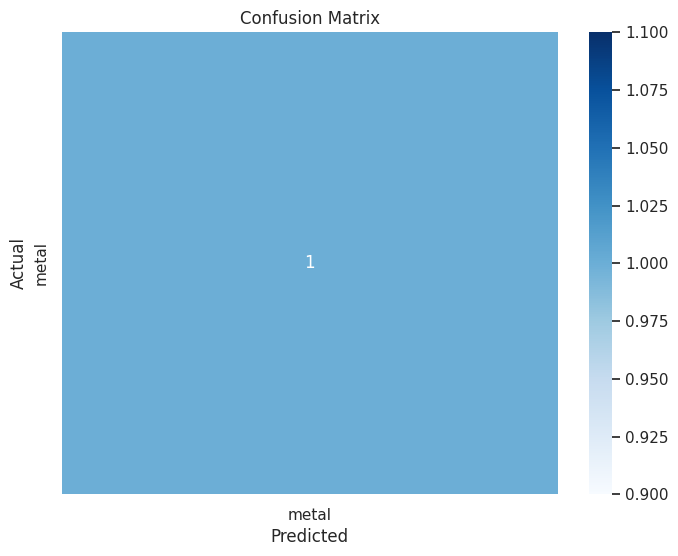

Classification Report:
              precision    recall  f1-score   support

       metal       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [152]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming 'df_merged' contains your data with features and target 'Type'

# Step 1: Prepare the features and target
X = df_merged.select_dtypes(include=[float, int])  # Select only numeric columns
y = df_merged['Type']  # The target column (metal, dielectric, semiconductor)

# Step 2: Check class distribution
print("Class distribution before filtering:")
print(y.value_counts())  # Check how many samples per class

# Step 3: Filter out classes with only 1 sample (like 'dielectric')
class_counts = y.value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_merged[df_merged['Type'].isin(classes_to_keep)]  # Filter out classes with <=1 sample

# Re-prepare the features and target after filtering
X = df_filtered.select_dtypes(include=[float, int])
y = df_filtered['Type']

# Step 4: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Handle class imbalance using class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Step 6: Train the RandomForest Classifier with class weights
rf_clf = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
rf_clf.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = rf_clf.predict(X_test)

# Step 8: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 9: Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


- Pick 2 random features that you think are most predictive and plot decision boundary in feature space.  

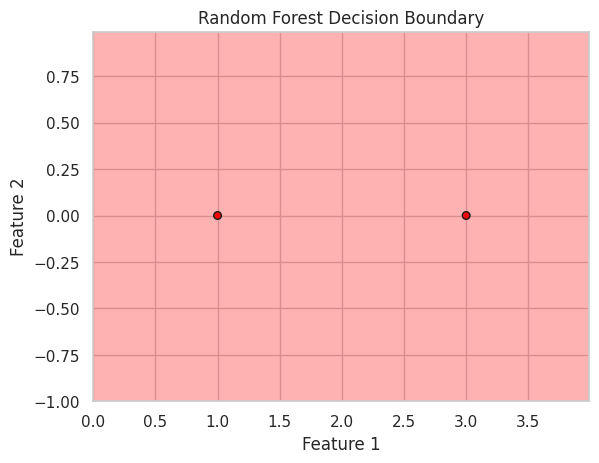

In [157]:
# Step 1: Select two random features that you think are most predictive
# Assuming df_merged has your full data
X = df_merged[['Feature_1', 'Feature_2']]  # Replace with actual feature names
y = df_merged['Type']  # The target variable

# Step 2: Handle non-numeric data
# Use OneHotEncoding if any features are categorical
X_encoded = pd.get_dummies(X)  # This will handle categorical features by encoding them

# Ensure target variable y is numeric if needed
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 3: Since X_encoded might have more than two features, select the first two columns for simplicity
X_encoded = X_encoded.iloc[:, :2]  # Use only the first two encoded features for visualization

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Step 5: Train the RandomForest Classifier using only the two selected features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Create a function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Convert mesh grid into a DataFrame to include feature names
    grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)

    Z = classifier.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1')  # Adjust based on actual feature names
    plt.ylabel('Feature 2')
    plt.show()

# Step 7: Plot the decision boundary
plot_decision_boundary(X_train, y_train, clf, 'Random Forest Decision Boundary')